In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_hastie_10_2
import os

In [75]:
from sklearn.preprocessing import StandardScaler as ss

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.decomposition import PCA

In [78]:
data = pd.read_csv("cardio.csv")

In [79]:
data.shape

(70000, 13)

In [80]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [81]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [82]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [84]:
df=data.drop(['id'],axis=1)

In [85]:
df.shape

(70000, 12)

In [86]:
X = df.loc[: , 'age':'active']
y = df.loc[:, 'cardio']

In [87]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [88]:
scale = ss()
X = scale.fit_transform(X)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [89]:
pca = PCA()
out = pca.fit_transform(X)
out.shape

(70000, 11)

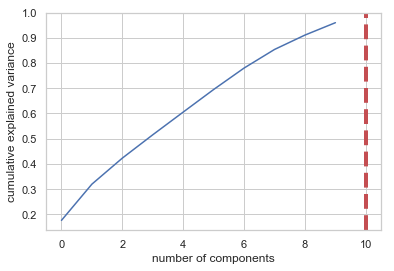

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.176453,0.176453
1,0.319865,0.143411
2,0.422953,0.103089
3,0.515332,0.092379
4,0.605254,0.089922
5,0.694600,0.089345
6,0.779566,0.084966
7,0.853145,0.073579
8,0.910101,0.056956
9,0.959111,0.049010


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=10)
pca_test.fit(X)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [92]:
final_data = out[:, :10]

In [93]:
final_data.shape

(70000, 10)

In [94]:
final_data[:5,:]

array([[-0.52129326, -1.08938104,  0.18475132, -0.08952164, -0.5654763 ,
         0.28889258,  0.00280974, -1.13201609, -0.53509454, -0.16472681],
       [ 0.91245805,  1.72679824, -0.25365341,  0.19046163, -0.40566756,
         0.24601125, -0.00584228,  0.81880029,  0.63849504, -1.81462558],
       [ 0.8036938 ,  1.1143564 ,  0.19512034, -0.83235396,  1.57770666,
        -0.68021695,  0.75850902, -0.41281345, -0.01941187, -2.09609532],
       [-1.04480509, -0.80589152,  0.83834548,  0.12542227, -0.6483056 ,
         0.41010184,  0.35283116, -0.1509533 , -0.18738372, -0.06197763],
       [ 1.5472803 , -1.08040778, -0.19960323, -0.76488696,  1.71082335,
        -0.87352646,  0.76998369, -0.34031151,  0.02744296, -0.04978804]])

In [95]:
pcdf = pd.DataFrame( data =  final_data,
                    columns = ['pc1', 'pc2','pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

In [54]:
pcdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.323706,-0.335134,-0.074132,0.191366,0.239400,0.608063,-0.187400,0.640065,-0.804812,-0.316806
1,-0.472416,-0.503312,-0.922240,-0.082334,0.208440,0.572452,0.170093,-0.722387,-0.056091,0.033971
2,1.774979,0.080390,0.973262,0.470435,-0.381400,1.220165,0.308716,-0.871541,0.174095,1.008197
3,0.245283,0.422956,-1.525404,1.088992,0.895601,-0.078168,-0.442979,-1.487181,-0.400928,1.264468
4,-0.065876,0.228915,0.574343,0.315924,0.000304,-0.400462,-0.864038,0.567984,-0.321815,-0.590852


In [96]:
pcdf['target'] = data['cardio'].map({"1":1,"0":0})

In [97]:
pcdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,-0.521293,-1.089381,0.184751,-0.089522,-0.565476,0.288893,0.002810,-1.132016,-0.535095,-0.164727,NaN
1,0.912458,1.726798,-0.253653,0.190462,-0.405668,0.246011,-0.005842,0.818800,0.638495,-1.814626,NaN
2,0.803694,1.114356,0.195120,-0.832354,1.577707,-0.680217,0.758509,-0.412813,-0.019412,-2.096095,NaN
3,-1.044805,-0.805892,0.838345,0.125422,-0.648306,0.410102,0.352831,-0.150953,-0.187384,-0.061978,NaN
4,1.547280,-1.080408,-0.199603,-0.764887,1.710823,-0.873526,0.769984,-0.340312,0.027443,-0.049788,NaN


In [98]:
pcdf["target"].fillna('0',limit=35000, inplace = True)
pcdf["target"].fillna('1',limit=35000, inplace = True)
pcdf
pcdf.to_csv('cardiopca.csv') 

In [99]:
X = pcdf.loc[: , 'pc1':'pc10']
y = pcdf.loc[:,'target']

In [100]:
X.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-0.521293,-1.089381,0.184751,-0.089522,-0.565476,0.288893,0.002810,-1.132016,-0.535095,-0.164727
1,0.912458,1.726798,-0.253653,0.190462,-0.405668,0.246011,-0.005842,0.818800,0.638495,-1.814626
2,0.803694,1.114356,0.195120,-0.832354,1.577707,-0.680217,0.758509,-0.412813,-0.019412,-2.096095
3,-1.044805,-0.805892,0.838345,0.125422,-0.648306,0.410102,0.352831,-0.150953,-0.187384,-0.061978
4,1.547280,-1.080408,-0.199603,-0.764887,1.710823,-0.873526,0.769984,-0.340312,0.027443,-0.049788


In [101]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: object

In [102]:
y.tail()

69995    1
69996    1
69997    1
69998    1
69999    1
Name: target, dtype: object